# FIFA WORLDCUP 2022 PREDICTION

In order to predict the winner of the 2022 FIFA World Cup, it's important to analyze the data to gain insights and understand the key takeaways from previous matches.<br>

In this EDA , we will be focusing on analyzing FIFA international matches data from 2012 to 2017 including match results & team performance. We will be using data visualization techniques to explore patterns and trends in the data, and statistical methods to analyze and make inferences about the tournament.<br>

Some of the key questions we will be trying to answer include:<br>

1. Average possession percentage for team1 and team2<br>
2. Impact of possession versus number of goals scored by team1 and team2<br>
3. Comparison of total attempts, on target attempts, and goals scored by team1 and team2<br>
4. Distribution of goals scored by team1 and team2<br>

>## Libraries we are using in this project

1. pandas<br>
2. numpy<br>
3. matplotlib<br>

### 1. Acquisition of Data

 - Collect data on the teams that participated in international matches, including match results and overall team performance.<br>
 - Clean and organize the data, and make sure it is in a format that can be easily analyzed.<br>

 - ### Import Pandas and Numpy libraries

In [236]:
import pandas as pd
import numpy as np
import seaborn as sns

In [237]:
df=pd.read_csv("FIFAallMatchBoxData.csv")

 - ### Check the complete dataframe

In [238]:
df

,year,hname,aname,hgoals,agoals,hPossesion,aPossesion,hshotsOnTarget,ashotsOnTarget,hshots,ashots,hyellowCards,ayellowCards,hredCards,aredCards,hfouls,afouls,hsaves,asaves
0,2012,Mexico,Costa Rica,1,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0
1,2012,Antigua and Barbuda,United States,1,2,24,76,2,4,14,17,1,1,0,0,11,13,2,1
2,2012,United States,Guatemala,3,1,80,20,3,1,5,2,0,0,0,0,1,3,0,1
3,2013,Honduras,United States,2,1,57,43,4,2,12,11,0,0,0,0,10,12,1,2
4,2013,Panama,Costa Rica,2,2,47,53,5,3,13,11,1,1,0,0,7,10,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,2017,Bulgaria,Netherlands,2,0,26,74,4,3,6,9,0,0,0,0,7,10,3,2
1478,2017,Luxembourg,France,1,3,37,63,1,9,3,17,3,1,0,0,19,9,6,0
1479,2017,Faroe Islands,Andorra,1,0,68,32,2,1,6,7,1,5,0,0,22,19,1,1
1480,2017,Netherlands,Bulgaria,3,1,65,35,5,2,19,9,1,5,0,0,19,17,1,2


### 2. Data Analysis

In [239]:
df.columns

Index(['year', 'hname', 'aname', 'hgoals', 'agoals', 'hPossesion',
       'aPossesion', 'hshotsOnTarget', 'ashotsOnTarget', 'hshots', 'ashots',
       'hyellowCards', 'ayellowCards', 'hredCards', 'aredCards', 'hfouls',
       'afouls', 'hsaves', 'asaves'],
      dtype='object')

In [240]:
df.head()

,year,hname,aname,hgoals,agoals,hPossesion,aPossesion,hshotsOnTarget,ashotsOnTarget,hshots,ashots,hyellowCards,ayellowCards,hredCards,aredCards,hfouls,afouls,hsaves,asaves
0,2012,Mexico,Costa Rica,1,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0
1,2012,Antigua and Barbuda,United States,1,2,24,76,2,4,14,17,1,1,0,0,11,13,2,1
2,2012,United States,Guatemala,3,1,80,20,3,1,5,2,0,0,0,0,1,3,0,1
3,2013,Honduras,United States,2,1,57,43,4,2,12,11,0,0,0,0,10,12,1,2
4,2013,Panama,Costa Rica,2,2,47,53,5,3,13,11,1,1,0,0,7,10,1,3


In [241]:
df.tail()

,year,hname,aname,hgoals,agoals,hPossesion,aPossesion,hshotsOnTarget,ashotsOnTarget,hshots,ashots,hyellowCards,ayellowCards,hredCards,aredCards,hfouls,afouls,hsaves,asaves
1477,2017,Bulgaria,Netherlands,2,0,26,74,4,3,6,9,0,0,0,0,7,10,3,2
1478,2017,Luxembourg,France,1,3,37,63,1,9,3,17,3,1,0,0,19,9,6,0
1479,2017,Faroe Islands,Andorra,1,0,68,32,2,1,6,7,1,5,0,0,22,19,1,1
1480,2017,Netherlands,Bulgaria,3,1,65,35,5,2,19,9,1,5,0,0,19,17,1,2
1481,2017,Gibraltar,Bosnia and Herzegovina,0,4,29,71,0,9,1,22,0,1,0,0,10,6,5,0


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            1482 non-null   int64 
 1   hname           1482 non-null   object
 2   aname           1482 non-null   object
 3   hgoals          1482 non-null   int64 
 4   agoals          1482 non-null   int64 
 5   hPossesion      1482 non-null   int64 
 6   aPossesion      1482 non-null   int64 
 7   hshotsOnTarget  1482 non-null   int64 
 8   ashotsOnTarget  1482 non-null   int64 
 9   hshots          1482 non-null   int64 
 10  ashots          1482 non-null   int64 
 11  hyellowCards    1482 non-null   int64 
 12  ayellowCards    1482 non-null   int64 
 13  hredCards       1482 non-null   int64 
 14  aredCards       1482 non-null   int64 
 15  hfouls          1482 non-null   int64 
 16  afouls          1482 non-null   int64 
 17  hsaves          1482 non-null   int64 
 18  asaves  

In [243]:
df.dtypes

year               int64
hname             object
aname             object
hgoals             int64
agoals             int64
hPossesion         int64
aPossesion         int64
hshotsOnTarget     int64
ashotsOnTarget     int64
hshots             int64
ashots             int64
hyellowCards       int64
ayellowCards       int64
hredCards          int64
aredCards          int64
hfouls             int64
afouls             int64
hsaves             int64
asaves             int64
dtype: object

 - ### Checking whether null values are present or not

In [244]:
df.isnull().sum()

year              0
hname             0
aname             0
hgoals            0
agoals            0
hPossesion        0
aPossesion        0
hshotsOnTarget    0
ashotsOnTarget    0
hshots            0
ashots            0
hyellowCards      0
ayellowCards      0
hredCards         0
aredCards         0
hfouls            0
afouls            0
hsaves            0
asaves            0
dtype: int64

In [245]:
df.isnull().values.any()

False

### Conclusion

Conclusion: No null values present in the dataframe

 - ### Checking for duplicates

In [246]:
df.duplicated().sum()

0

### Conclusion: No duplicates present

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            1482 non-null   int64 
 1   hname           1482 non-null   object
 2   aname           1482 non-null   object
 3   hgoals          1482 non-null   int64 
 4   agoals          1482 non-null   int64 
 5   hPossesion      1482 non-null   int64 
 6   aPossesion      1482 non-null   int64 
 7   hshotsOnTarget  1482 non-null   int64 
 8   ashotsOnTarget  1482 non-null   int64 
 9   hshots          1482 non-null   int64 
 10  ashots          1482 non-null   int64 
 11  hyellowCards    1482 non-null   int64 
 12  ayellowCards    1482 non-null   int64 
 13  hredCards       1482 non-null   int64 
 14  aredCards       1482 non-null   int64 
 15  hfouls          1482 non-null   int64 
 16  afouls          1482 non-null   int64 
 17  hsaves          1482 non-null   int64 
 18  asaves  

 - ### Checking for duplicates

In [248]:
duplicate_rows = df.duplicated()

In [249]:
duplicate_rows

0       False
1       False
2       False
3       False
4       False
        ...  
1477    False
1478    False
1479    False
1480    False
1481    False
Length: 1482, dtype: bool

In [250]:
duplicate_rows_count = duplicate_rows.sum()
print('Number of duplicate rows:', duplicate_rows_count)

Number of duplicate rows: 0


### Conclusion: No duplicates present

### 3. Data Visualizations

### IMPORTING MATPLOTLIB AND SEABORN

Thess are data visualisation libraries in python used for better pictorial representation of data to get a better understanding on data.

In [251]:
import matplotlib.pyplot as plt

### Average possession percentage for team1 and team2:

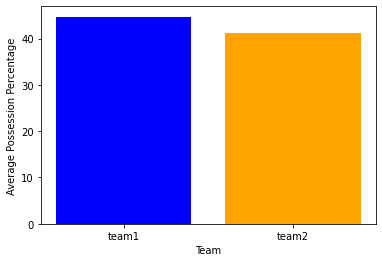

In [252]:
team1_possession = df["hPossesion"]
team2_possession = df["aPossesion"]
team1 = ("hname")
team2 = ("aname")

plt.bar(["team1", "team2"], [team1_possession.mean(), team2_possession.mean()],color = ['blue','orange'])
plt.xlabel("Team")
plt.ylabel("Average Possession Percentage")
plt.show()

### Possession versus Goals scored for team1:

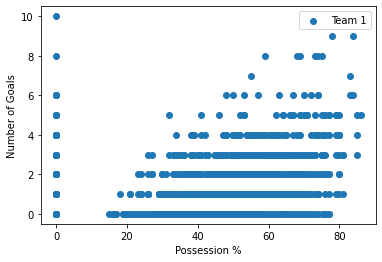

In [253]:
possession_in_contest = df["hPossesion"]
goals_team1 = df["hgoals"]

plt.scatter(possession_in_contest,goals_team1, label="Team 1")
plt.xlabel("Possession %")
plt.ylabel("Number of Goals")
plt.legend()
plt.show()

### Possession versus Goals scored for Team 2:

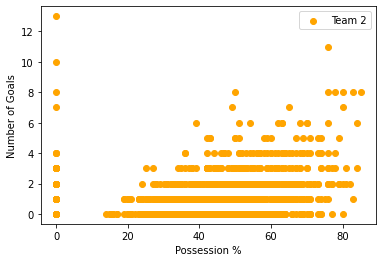

In [254]:
possession_in_contest = df["aPossesion"]
goals_team1 = df["agoals"]

plt.scatter(possession_in_contest, goals_team1, label="Team 2", color = 'orange')
plt.xlabel("Possession %")
plt.ylabel("Number of Goals")
plt.legend()
plt.show()

### Comparison of total attempts, on target attempts, and goals scored for team1 and team2

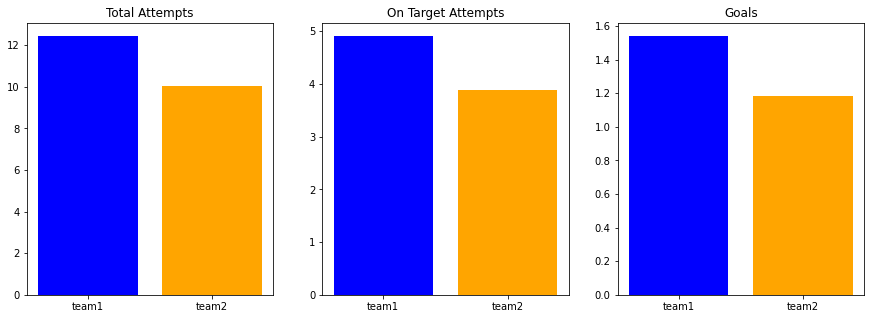

In [255]:
team1_total_attempts = df["hshots"]
team2_total_attempts = df["ashots"]
team1_on_target = df["hshotsOnTarget"]
team2_on_target = df["ashotsOnTarget"]
team1_penalty_attempts = df["hgoals"]
team2_penalty_attempts = df["agoals"]

team1 = ("hname")
team2 = ("aname")

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].bar(["team1", "team2"], [team1_total_attempts.mean(), team2_total_attempts.mean()],color = ['blue','orange'])
axs[0].set_title("Total Attempts")
axs[1].bar(["team1", "team2"], [team1_on_target.mean(), team2_on_target.mean()],color = ['blue','orange'])
axs[1].set_title("On Target Attempts")
axs[2].bar(["team1", "team2"], [team1_penalty_attempts.mean(), team2_penalty_attempts.mean()],color = ['blue','orange'])
axs[2].set_title("Goals")
plt.show()

### Distribution of goals scored by team1 in matches from 2012 to 2017

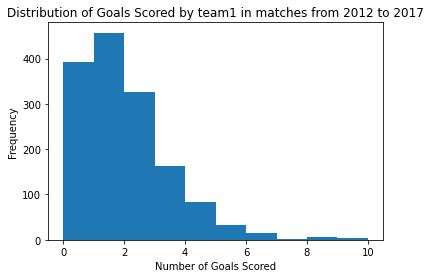

In [256]:
plt.hist(df['hgoals'], bins = range(0, df['hgoals'].max()+1))

# Add labels and title
plt.xlabel('Number of Goals Scored')
plt.ylabel('Frequency')
plt.title('Distribution of Goals Scored by team1 in matches from 2012 to 2017')

# Show plot
plt.show()

### Distribution of goals scored by team2 in matches from 2012 to 2017

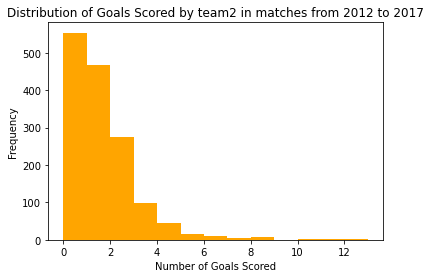

In [257]:
plt.hist(df['agoals'],color = 'orange',bins = range(0, df['agoals'].max()+1))

# Add labels and title
plt.xlabel('Number of Goals Scored')
plt.ylabel('Frequency')
plt.title('Distribution of Goals Scored by team2 in matches from 2012 to 2017')

# Show plot
plt.show()

# CONCLUSION

> In conclusion, the analysis of the FIFA dataset revealed the following insights:

1. On average, team1 has a better posession % than team2.<br>
2. Both team1 and team2 scored more goals when they had more ball possession with team1 scoring more than team2.<br>
3. Team1 had better stats across Total Attempts, On Target Attempts as well as Goals Scored compared to team2.<br>
4. Team2 had a better distribution of goals scored compared to team1.<br>

It can be inferred that possession and attempts are crucial factors in determining the number of goals scored in a match, however, it is not the only factor, other factors like team strategies, player skills, and luck also play a role.<br>